##### **This Jupyter Notebook covers exploratory data analysis (EDA) and data cleaning.**

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**IMPORTING DATASET**

In [3]:
df=pd.read_csv("new_file.csv")

**DATA VISUALIZATION**

In [4]:
df.head()



,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [8]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

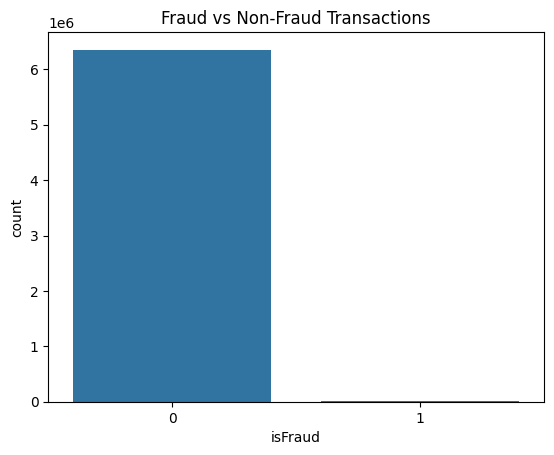

In [9]:
sns.countplot(x='isFraud',data=df)
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

<Axes: xlabel='type', ylabel='count'>

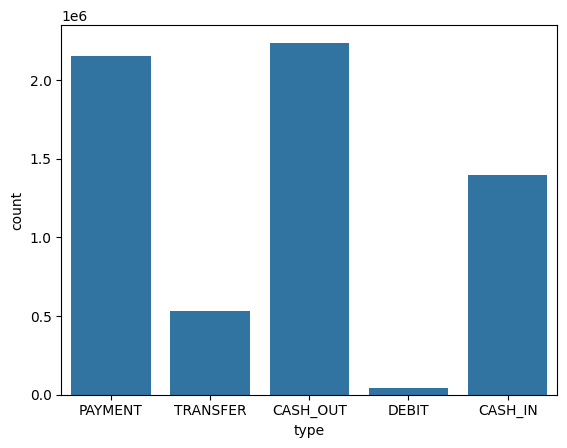

In [10]:
sns.countplot(x='type',data=df)

<Axes: xlabel='type', ylabel='amount'>

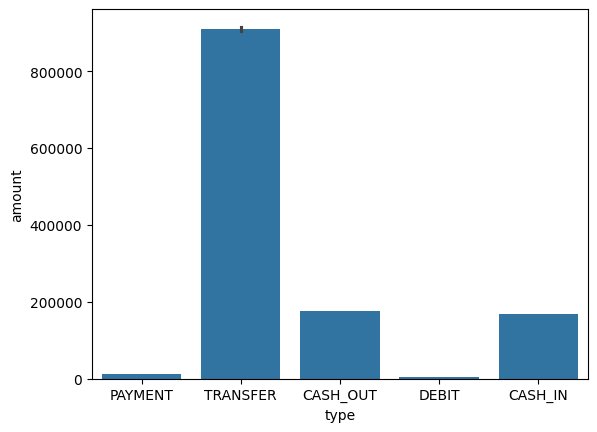

In [11]:
sns.barplot(x='type',y='amount',data=df)

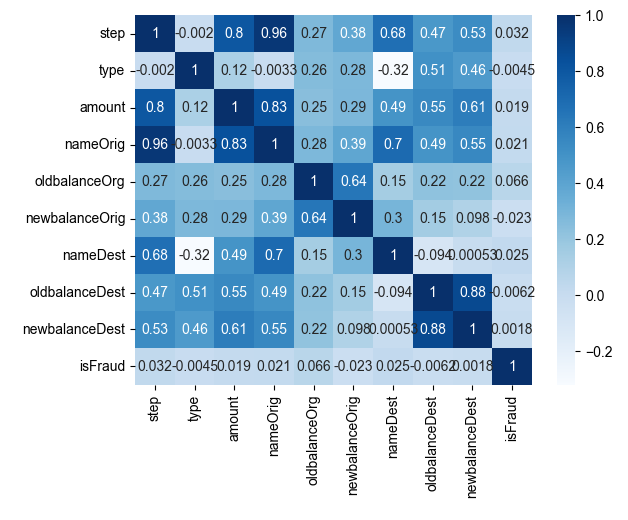

<Figure size 800x900 with 0 Axes>

In [12]:
df_mx=df.apply(lambda x: pd.factorize(x)[0]).corr()
sns.heatmap(df_mx,annot=True,cmap='Blues')
sns.set_context='paper'
sns.set(font_scale=0.7)
plt.figure(figsize=(8,9)) 
plt.show()

### **Conclusions from Exploratory Data Analysis**

- **Class Imbalance:** The dataset is extremely imbalanced, with fraudulent transactions making up a tiny fraction of all records. This will require special handling during model training to avoid bias toward the majority class.
- **Transaction Types:** PAYMENT, CASH_IN, and CASH_OUT are the most common transaction types. However, the largest transaction amounts are typically seen in TRANSFER, CASH_IN, and CASH_OUT, which may be more relevant for fraud detection.
- **Feature Relationships:** There are strong correlations between certain features, such as between old and new balances for both the sender and receiver, and between step and nameOrig. This indicates potential multicollinearity, which could affect some models and may be addressed through feature selection or engineering.
- **Target Correlation:** No single feature has a strong linear correlation with the target variable (`isFraud`). This suggests that fraud is not easily detected by simple rules and that more complex, possibly nonlinear, relationships are present in the data.
- **Implications for Modeling:** Given the lack of strong linear predictors and the presence of multicollinearity, advanced feature engineering (such as creating error features) and the use of robust machine learning models (like tree-based or ensemble methods) will be crucial for effective fraud detection.

### **DATA CLEANING**

In [13]:

df=df.drop(['nameOrig','nameDest','step'],axis=1)

In [14]:
df["errorOrig"] = df["oldbalanceOrg"] - df["amount"] - df["newbalanceOrig"]
df["errorDest"] = df["newbalanceDest"] + df["amount"] - df["oldbalanceDest"]

**Saving it to a csv file for preprocessing and training**

In [15]:
df.to_csv("cleaned.csv",index=False)